## Лабораторная работа № 1 - Работа с библиотекой pandas в Python. Упражнения (часть 2)

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, shapiro, normaltest
import numpy as np

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [3]:
#data = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/pima-indians-diabetes.csv')
data = pd.read_csv('dataset.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1.__

Как вы видите, в данных много пропусков (NaN). Посчитайте количество пропусков в каждом из столбцов.

In [4]:
total_nans = data.isna().sum()
print(total_nans)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64


__Задание 2.__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [64]:
categorial_cols = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'Age'
]
numerical_cols = [
    'BMI',
    'DiabetesPedigreeFunction'
]
for col in categorial_cols:
    median = data[col].dropna().median()
    data[col] = data[col].fillna(median)

for col in numerical_cols:
    avg = data[col].dropna().mean()
    data[col] = data[col].fillna(avg)

__Задание 3.__

Вычислите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [65]:
all_columns = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'Age',
    'BMI',
    'DiabetesPedigreeFunction',
    'Class'
]
for col in all_columns:
    minimum = data[col].min()
    maxium = data[col].max()
    mean = data[col].mean()
    disp = data[col].var()
    quant1 = data[col].quantile(0.25)
    quant2 = data[col].quantile(0.5)
    quant3 = data[col].quantile(0.75)
    print(f'col: {col}, min: {minimum}, max: {maxium}, mean:{mean}, var: {disp},\n q1: {quant1}, q2: {quant2}, q3: {quant3}')


col: Pregnancies, min: 0, max: 17, mean:3.8450520833333335, var: 11.354056320621465,
 q1: 1.0, q2: 3.0, q3: 6.0
col: Glucose, min: 44.0, max: 199.0, mean:121.65625, var: 926.4892438070405,
 q1: 99.75, q2: 117.0, q3: 140.25
col: BloodPressure, min: 24.0, max: 122.0, mean:72.38671875, var: 146.32874124022163,
 q1: 64.0, q2: 72.0, q3: 80.0
col: SkinThickness, min: 7.0, max: 99.0, mean:29.108072916666668, var: 77.28556707681442,
 q1: 25.0, q2: 29.0, q3: 32.0
col: Insulin, min: 14.0, max: 846.0, mean:140.671875, var: 7462.033001955671,
 q1: 121.5, q2: 125.0, q3: 127.25
col: Age, min: 21, max: 81, mean:33.240885416666664, var: 138.30304589037377,
 q1: 24.0, q2: 29.0, q3: 41.0
col: BMI, min: 18.2, max: 67.1, mean:32.457463672391015, var: 47.26770577607691,
 q1: 27.5, q2: 32.4, q3: 36.6
col: DiabetesPedigreeFunction, min: 0.078, max: 2.42, mean:0.47187630208333325, var: 0.1097786378731394,
 q1: 0.24375, q2: 0.3725, q3: 0.62625
col: Class, min: 0, max: 1, mean:0.3489583333333333, var: 0.2274826

__Задание 4.__

У скольких женщин старше 50 лет обнаружен диабет?

In [66]:
condition = (data['Class'] == 1) & (data['Age'] > 50)
count = condition.sum()
print(count) 

38


__Задание 5.__

Найдите трех женщин с наибольшим числом беременностей.

In [67]:
top_values = data.nlargest(3, columns='Pregnancies')
print(top_values)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
159           17    163.0           72.0           41.0    114.0  40.9   
88            15    136.0           70.0           32.0    110.0  37.1   
298           14    100.0           78.0           25.0    184.0  36.6   

     DiabetesPedigreeFunction  Age  Class  
159                     0.817   47      1  
88                      0.153   43      1  
298                     0.412   46      1  


__Задание 6.__

Сколько женщин возраста между 30 и 40 успело родить 3 или более детей?

In [68]:
condition = (data['Age'] > 30) & (data['Age'] < 40) & (data['Pregnancies'] >= 3)
print(condition.sum())

115


__Задание 7.__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [5]:
condition = (data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89)
normal_pressure_count = condition.sum()
total_count = data.shape[0]
print(f'Percentage: {normal_pressure_count / total_count * 100} %')

Percentage: 18.880208333333336 %


__Задание 8.__

Считается, что BMI >= 30 - это признак ожирения. 
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [70]:
mean_pressure = data['BloodPressure'].mean()
condition = (data['BloodPressure'] > mean_pressure) & (data['BMI'] >= 30)
print(condition.sum())

251


__Задание 9.__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет. 

In [71]:
# Glucose ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
no_deb = data[data['Class'] == 0]
deb = data[data['Class'] == 1]

print(f'Глюкоза: {deb["Glucose"].mean()}, {no_deb["Glucose"].mean()}')

Глюкоза: 142.13059701492537, 110.682


In [72]:
# BloodPressure ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
print(f'Давление: {deb["BloodPressure"].mean()}, {no_deb["BloodPressure"].mean()}')

Давление: 75.1231343283582, 70.92


In [73]:
# Insulin ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
print(f'Инсулин: {deb["Insulin"].mean()}, {no_deb["Insulin"].mean()}')

Инсулин: 164.70149253731344, 127.792


__Задание 10.__

Постройте гистограммы для любых двух количественных признаков.

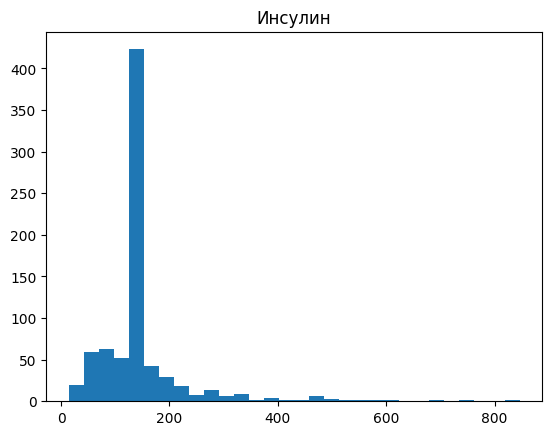

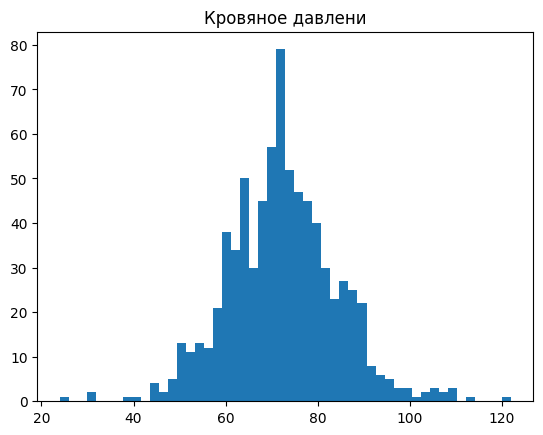

In [74]:
gist1 = data['Insulin']
plt.hist(gist1, bins=30)
plt.title('Инсулин')
plt.show()

gist2 = data['BloodPressure']
plt.hist(gist2, bins=50)
plt.title('Кровяное давлени')
plt.show()

__Задание 11.__

Постройте круговую диаграмму для признака __Class__.

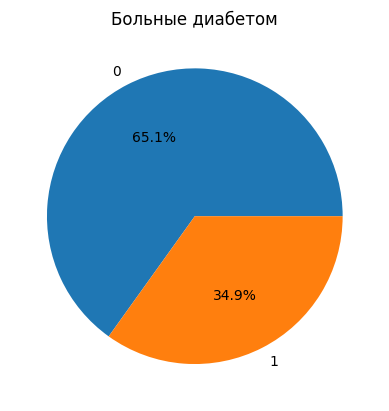

In [75]:
freq = data['Class'].value_counts()
plt.pie(freq, labels=freq.index, autopct='%1.1f%%')
plt.title('Больные диабетом')
plt.show()

__Задание 12.__

Постройте распределения для признаков __Age__ и __BloodPressure__ и сравните оба распределения с нормальным. 

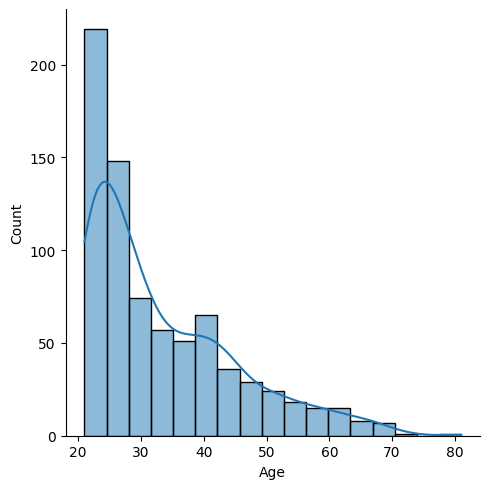

Age: p-value = 0.000000
Не соответствует нормальному распределению


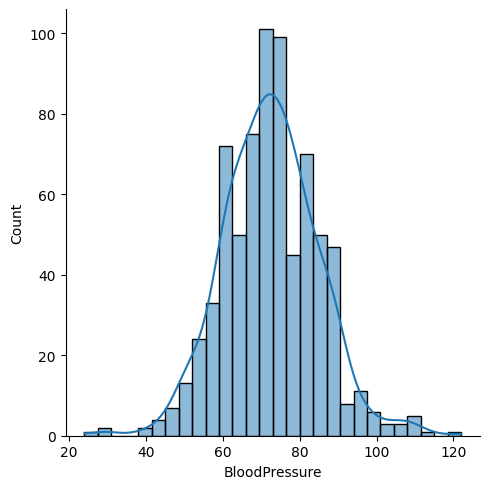

BloodPressure: p-value = 0.000095
Не соответствует нормальному распределению


In [23]:

features = ['Age', 'BloodPressure']

for i, feature in enumerate(features):
    sns.displot(data[feature], kind='hist', kde=True)
    plt.show()
#     # Тест для каждого признака отдельно
    stat, p_val = shapiro(data[feature].dropna())
    print(f'{feature}: p-value = {p_val:.6f}')
    if p_val > 0.05:
        print('Соответствует нормальному распределению')
    else:
        print('Не соответствует нормальному распределению')


__Задание 13.__

Постройте следующий график: число больных диабетом в зависимости от числа беременностей.

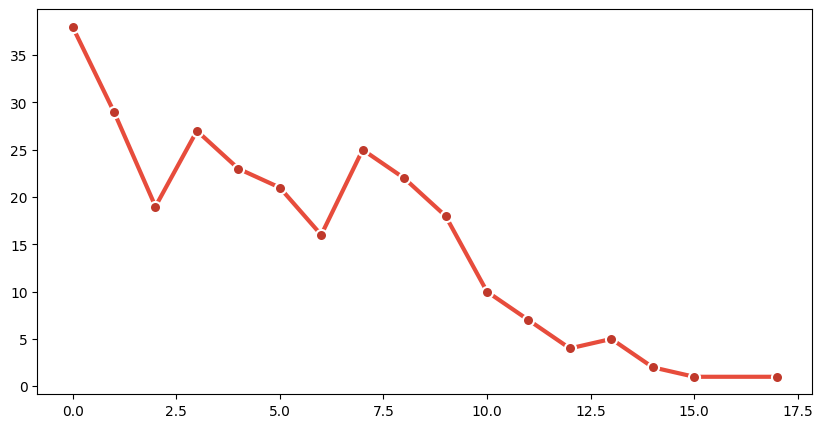

In [42]:
dib_by_preg = data.groupby('Pregnancies')['Class'].agg(['count', 'sum']).reset_index()
dib_by_preg.columns =['Pregnansies', 'total_count', 'diabetes_count']
plt.figure(figsize=(10,5))

plt.plot(dib_by_preg['Pregnansies'], dib_by_preg['diabetes_count'], marker='o', linewidth=3, markersize=8, color='#E74C3C', markerfacecolor='#C0392B', markeredgecolor='white', markeredgewidth=1.5)

__Задание 14.__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [77]:
#print(data.dtypes)

data['wasPregnant'] = (data['Pregnancies'] > 0).astype(int)

data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant
0,6,148.0,72.0,35.0,125.0,33.600000,0.627,50,1,1
1,1,85.0,66.0,29.0,125.0,26.600000,0.351,31,0,1
2,8,183.0,64.0,29.0,125.0,23.300000,0.672,32,1,1
3,1,89.0,66.0,23.0,94.0,28.100000,0.167,21,0,1
4,0,137.0,40.0,35.0,168.0,43.100000,2.288,33,1,0
5,5,116.0,74.0,29.0,125.0,25.600000,0.201,30,0,1
6,3,78.0,50.0,32.0,88.0,31.000000,0.248,26,1,1
7,10,115.0,72.0,29.0,125.0,35.300000,0.134,29,0,1
8,2,197.0,70.0,45.0,543.0,30.500000,0.158,53,1,1
9,8,125.0,96.0,29.0,125.0,32.457464,0.232,54,1,1


__Задание 15.__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [78]:
dib_comp = data.groupby('wasPregnant')['Class'].agg([('Diabetes_Rate',  'mean'), ('Count', 'count'), ('Diabetic', 'sum'), ('Std', 'std')]).reset_index()

dib_comp['Diabetes_Percent'] = dib_comp['Diabetes_Rate'] * 100

print(dib_comp)

   wasPregnant  Diabetes_Rate  Count  Diabetic       Std  Diabetes_Percent
0            0       0.342342    111        38  0.476645         34.234234
1            1       0.350076    657       230  0.477357         35.007610


__Задание 16.__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 

Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [79]:
# your code here
def_bmi = lambda x : 'Underweight' if x < 18.5 else 'Normal_weight' if x > 18.5 and x < 24.9 else 'Overweight' if x > 25 and x < 29.9  else 'Obesity'

data['bodyType'] = data['BMI'].apply(def_bmi)
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant,bodyType
0,6,148.0,72.0,35.0,125.0,33.600000,0.627,50,1,1,Obesity
1,1,85.0,66.0,29.0,125.0,26.600000,0.351,31,0,1,Overweight
2,8,183.0,64.0,29.0,125.0,23.300000,0.672,32,1,1,Normal_weight
3,1,89.0,66.0,23.0,94.0,28.100000,0.167,21,0,1,Overweight
4,0,137.0,40.0,35.0,168.0,43.100000,2.288,33,1,0,Obesity
5,5,116.0,74.0,29.0,125.0,25.600000,0.201,30,0,1,Overweight
6,3,78.0,50.0,32.0,88.0,31.000000,0.248,26,1,1,Obesity
7,10,115.0,72.0,29.0,125.0,35.300000,0.134,29,0,1,Obesity
8,2,197.0,70.0,45.0,543.0,30.500000,0.158,53,1,1,Obesity
9,8,125.0,96.0,29.0,125.0,32.457464,0.232,54,1,1,Obesity


__Задание 17.__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [80]:
healthy = data[(data['bodyType'] == 'Normal_weight') & (data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89)]
healthy_dib_rate = healthy['Class'].mean()

print(f'Процент здоровых женщин, больных диабетом: {healthy_dib_rate * 100:.1f}%')

Процент здоровых женщин, больных диабетом: 10.0%
